In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from lightgbm import LGBMClassifier
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [4]:
df=pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.shape

(6497, 13)

In [7]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [11]:
median1=df['fixed acidity'].median()
median1

7.0

In [12]:
df['fixed acidity'].fillna(median1,inplace=True)

In [16]:
median2=df['volatile acidity'].median()
median2

0.29

In [17]:
df['volatile acidity'].fillna(median2,inplace=True)

In [18]:
median3=df['citric acid'].median()
median3

0.31

In [19]:
df['citric acid'].fillna(median3,inplace=True)

In [20]:
median4=df['residual sugar'].median()
median4

3.0

In [21]:
df['residual sugar'].fillna(median4,inplace=True)

In [22]:
median5=df['chlorides'].median()
median5

0.047

In [24]:
df['chlorides'].fillna(median5,inplace=True)

In [25]:
median6=df['pH'].median()
median6

3.21

In [26]:
df['pH'].fillna(median6,inplace=True)

In [27]:
median7=df['sulphates'].median()
median7

0.51

In [28]:
df['sulphates'].fillna(median7,inplace=True)

In [29]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

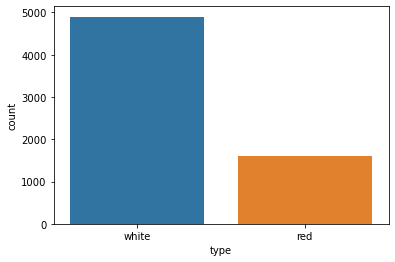

In [31]:
sns.countplot('type',data=df)

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

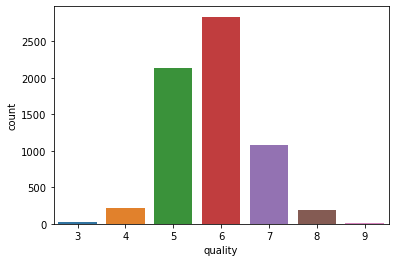

In [32]:
sns.countplot('quality',data=df)

<AxesSubplot:xlabel='type', ylabel='pH'>

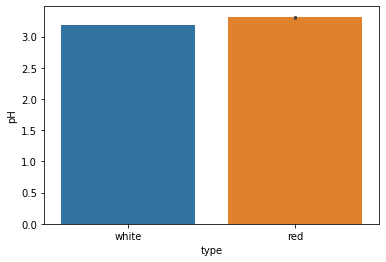

In [33]:
sns.barplot(x='type',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

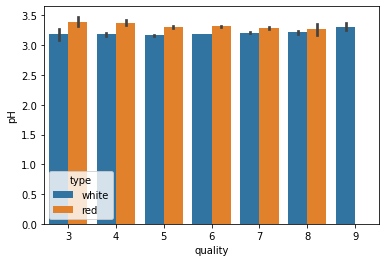

In [34]:
sns.barplot(x='quality',y='pH',hue='type',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

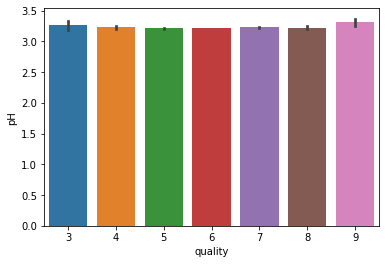

In [35]:
sns.barplot(x='quality',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

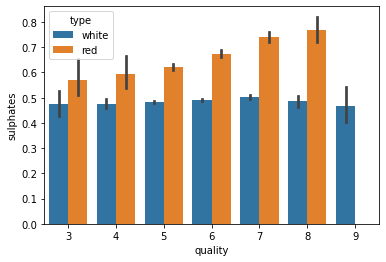

In [39]:
sns.barplot(x='quality',y='sulphates',hue='type',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

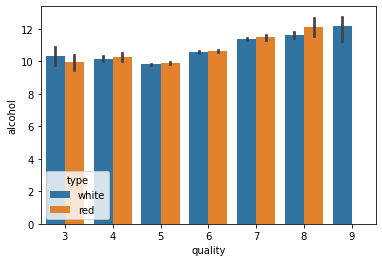

In [40]:
sns.barplot(x='quality',y='alcohol',hue='type',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

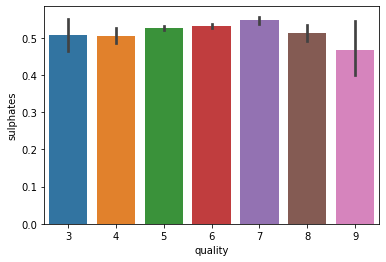

In [41]:
sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

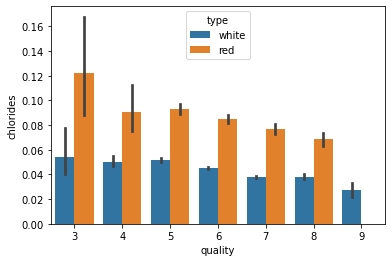

In [42]:
sns.barplot(x='quality',y='chlorides',hue='type',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

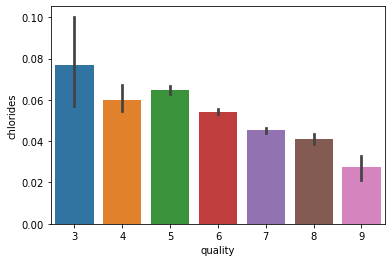

In [43]:
sns.barplot(x='quality',y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

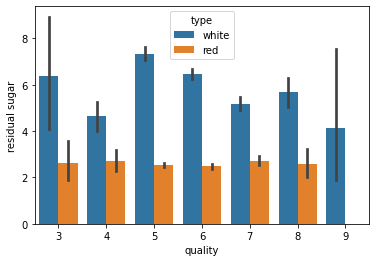

In [45]:
sns.barplot(x='quality',y='residual sugar',hue='type',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

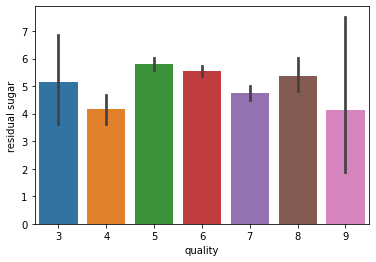

In [46]:
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

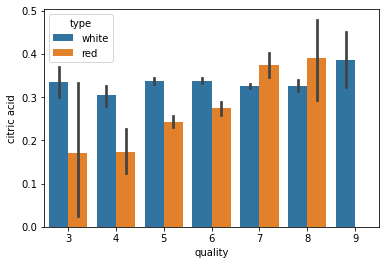

In [48]:
sns.barplot(x='quality',y='citric acid',hue='type',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

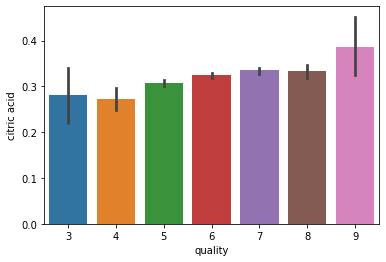

In [49]:
sns.barplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

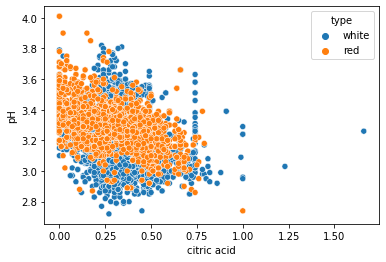

In [50]:
sns.scatterplot(x='citric acid',y='pH',hue='type',data=df)

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

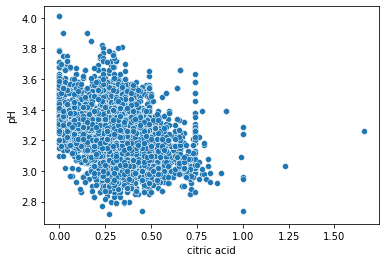

In [52]:
sns.scatterplot(x='citric acid',y='pH',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

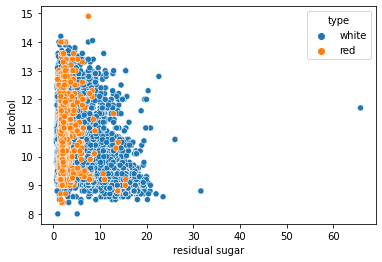

In [54]:
sns.scatterplot(x='residual sugar',y='alcohol',hue='type',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

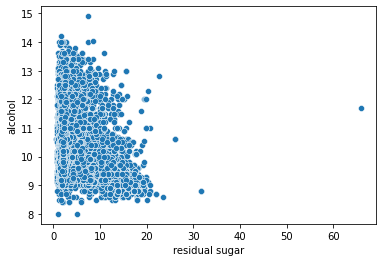

In [55]:
sns.scatterplot(x='residual sugar',y='alcohol',data=df)

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

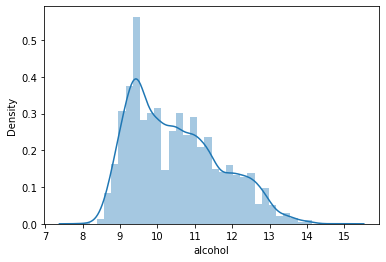

In [57]:
sns.distplot(df['alcohol'])

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

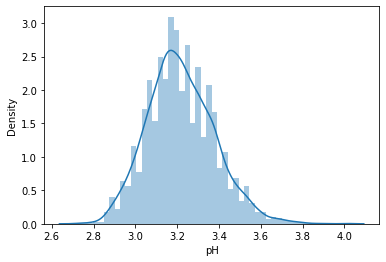

In [58]:
sns.distplot(df['pH'])

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

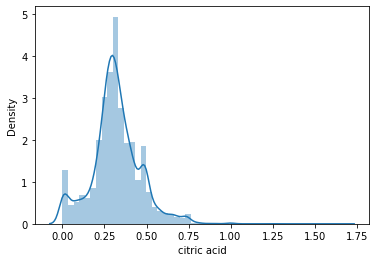

In [59]:
sns.distplot(df['citric acid'])

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

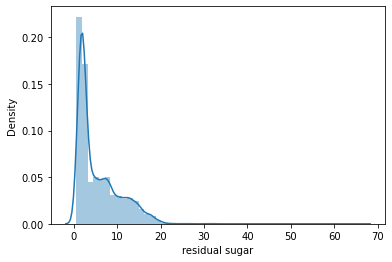

In [60]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

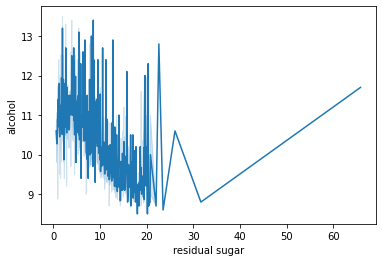

In [61]:
sns.lineplot(x='residual sugar',y='alcohol',data=df)

In [62]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [63]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [66]:
df['type'].replace(to_replace="white",value=0,inplace=True)
df['type'].replace(to_replace="red",value=1,inplace=True)

In [67]:
df['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [68]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [69]:
X=df.drop(['quality'],axis=1)#independent feature
y=df['quality']#dependent feature\

In [70]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [71]:
X.shape

(6497, 12)

In [72]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [88]:
y.shape

(6497,)

In [89]:
X.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
type,1.000000,0.486930,0.652674,-0.187078,-0.348878,0.512636,-0.471644,-0.700357,0.390645,0.328517,0.486607,-0.032970
fixed acidity,0.486930,1.000000,0.219872,0.323498,-0.112194,0.298249,-0.283164,-0.329421,0.458943,-0.251750,0.300198,-0.095561
volatile acidity,0.652674,0.219872,1.000000,-0.377827,-0.196275,0.377141,-0.353016,-0.414857,0.271144,0.260459,0.225160,-0.038083
citric acid,-0.187078,0.323498,-0.377827,1.000000,0.142411,0.039247,0.133412,0.195137,0.096294,-0.328371,0.057651,-0.010418
residual sugar,-0.348878,-0.112194,-0.196275,0.142411,1.000000,-0.128891,0.402978,0.495545,0.552520,-0.266779,-0.185715,-0.359503
chlorides,0.512636,0.298249,0.377141,0.039247,-0.128891,1.000000,-0.194973,-0.279565,0.362590,0.044881,0.395158,-0.256862
free sulfur dioxide,-0.471644,-0.283164,-0.353016,0.133412,0.402978,-0.194973,1.000000,0.720934,0.025717,-0.145112,-0.188470,-0.179838
total sulfur dioxide,-0.700357,-0.329421,-0.414857,0.195137,0.495545,-0.279565,0.720934,1.000000,0.032395,-0.237511,-0.275256,-0.265740
density,0.390645,0.458943,0.271144,0.096294,0.552520,0.362590,0.025717,0.032395,1.000000,0.011919,0.259414,-0.686745
pH,0.328517,-0.251750,0.260459,-0.328371,-0.266779,0.044881,-0.145112,-0.237511,0.011919,1.000000,0.190957,0.120949


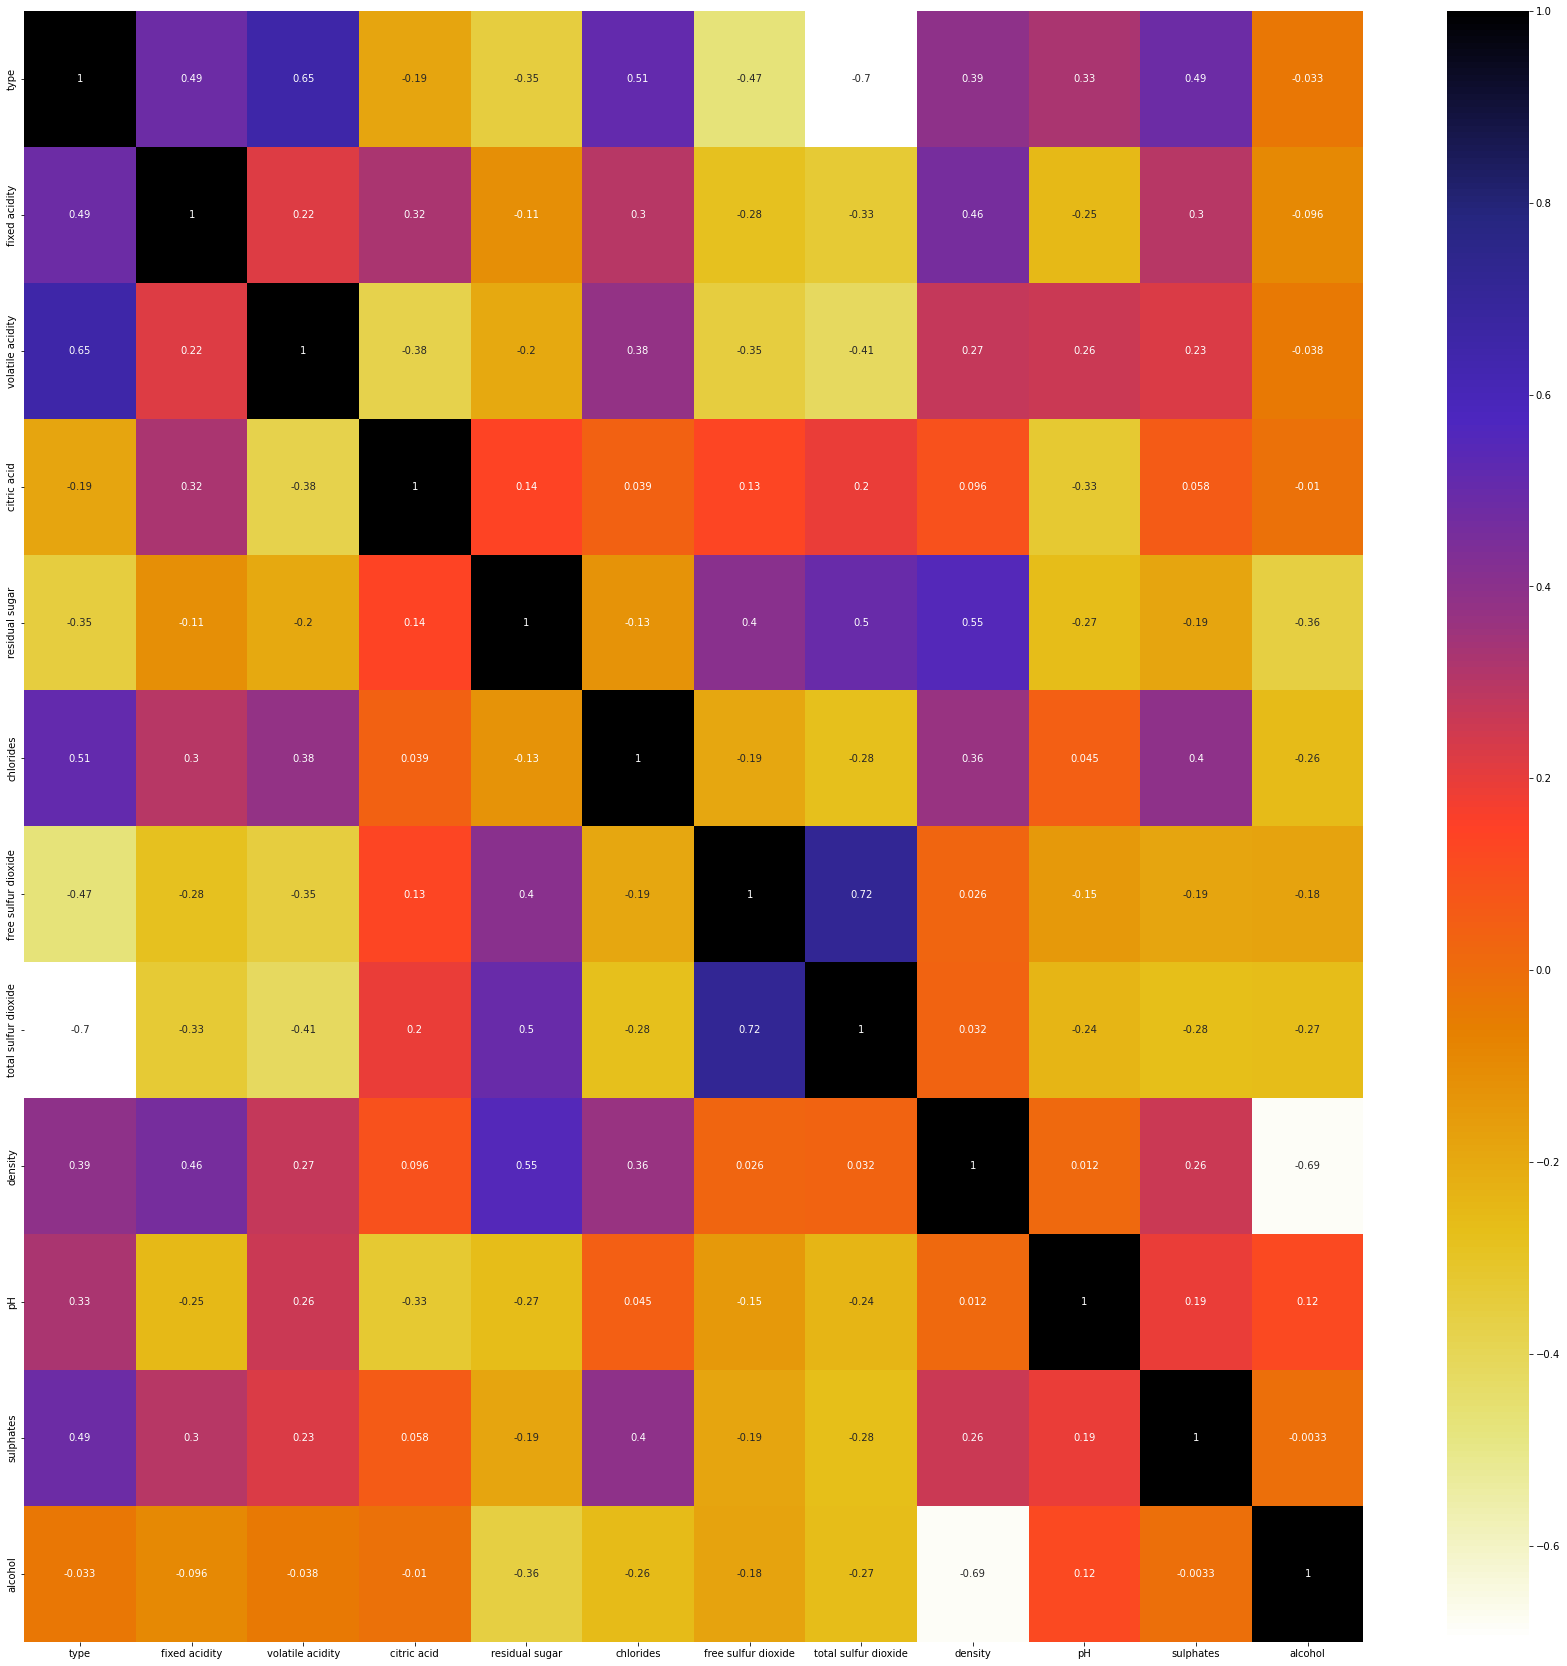

In [91]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [92]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [93]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

0

In [94]:
corr_features

set()

In [74]:
os=RandomOverSampler("minority")
X_os,y_os=os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_os)))

The number of classes before fit Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
The number of classes after fit Counter({6: 2836, 9: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30})


C:\Users\Somesh\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [77]:
os=RandomOverSampler("minority")
X_os1,y_os1=os.fit_resample(X_os,y_os)
print("The number of classes before fit {}".format(Counter(y_os)))
print("The number of classes after fit {}".format(Counter(y_os1)))

The number of classes before fit Counter({6: 2836, 9: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30})
The number of classes after fit Counter({6: 2836, 3: 2836, 9: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193})


C:\Users\Somesh\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [78]:
os=RandomOverSampler("minority")
X_os2,y_os2=os.fit_resample(X_os1,y_os1)
print("The number of classes before fit {}".format(Counter(y_os1)))
print("The number of classes after fit {}".format(Counter(y_os2)))

The number of classes before fit Counter({6: 2836, 3: 2836, 9: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193})
The number of classes after fit Counter({6: 2836, 8: 2836, 3: 2836, 9: 2836, 5: 2138, 7: 1079, 4: 216})


C:\Users\Somesh\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [79]:
os=RandomOverSampler("minority")
X_os3,y_os3=os.fit_resample(X_os2,y_os2)
print("The number of classes before fit {}".format(Counter(y_os2)))
print("The number of classes after fit {}".format(Counter(y_os3)))

The number of classes before fit Counter({6: 2836, 8: 2836, 3: 2836, 9: 2836, 5: 2138, 7: 1079, 4: 216})
The number of classes after fit Counter({6: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836, 5: 2138, 7: 1079})


C:\Users\Somesh\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [80]:
os=RandomOverSampler("minority")
X_os4,y_os4=os.fit_resample(X_os3,y_os3)
print("The number of classes before fit {}".format(Counter(y_os3)))
print("The number of classes after fit {}".format(Counter(y_os4)))

The number of classes before fit Counter({6: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836, 5: 2138, 7: 1079})
The number of classes after fit Counter({6: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836, 5: 2138})


C:\Users\Somesh\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [81]:
os=RandomOverSampler("minority")
X_os5,y_os5=os.fit_resample(X_os4,y_os4)
print("The number of classes before fit {}".format(Counter(y_os4)))
print("The number of classes after fit {}".format(Counter(y_os5)))

The number of classes before fit Counter({6: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836, 5: 2138})
The number of classes after fit Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


C:\Users\Somesh\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [82]:
X_os5.shape

(19852, 12)

In [83]:
X_os5.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [84]:
y_os5.shape

(19852,)

In [85]:
y_os5.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

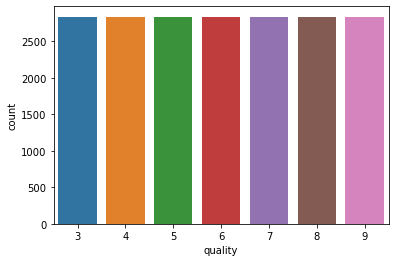

In [87]:
sns.countplot(y_os5)

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train1,X_test1,y_train1,y_test1=train_test_split(X_os5,y_os5,test_size=0.3,random_state=42)

In [96]:
X_train.shape

(4872, 12)

In [97]:
X_train1.shape

(13896, 12)

In [98]:
y_train.shape

(4872,)

In [99]:
y_train1.shape

(13896,)

In [102]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [103]:
y_pred

array([7, 6, 6, ..., 5, 6, 5], dtype=int64)

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

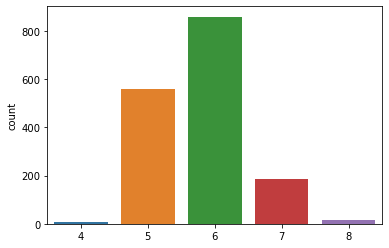

In [104]:
sns.countplot(y_pred)

In [105]:
print("Accuracy:\n",accuracy_score(y_pred,y_test)*100)
print("\n")
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))
print("\n")
print("Classification Report:\n",classification_report(y_pred,y_test))
print("\n")

Accuracy:
 67.93846153846154


Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   5   1   1   0   0]
 [  4  34 387 127   6   1]
 [  1  12 136 565 127  18]
 [  0   2   1  40 135   8]
 [  0   0   0   1   1  12]]


Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.09      0.71      0.17         7
           5       0.74      0.69      0.71       559
           6       0.77      0.66      0.71       859
           7       0.50      0.73      0.59       186
           8       0.31      0.86      0.45        14

    accuracy                           0.68      1625
   macro avg       0.40      0.61      0.44      1625
weighted avg       0.72      0.68      0.69      1625





C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
rfc1=RandomForestClassifier()
rfc1.fit(X_train1,y_train1)
y_pred1=rfc1.predict(X_test1)

In [107]:
y_pred1

array([5, 3, 5, ..., 6, 4, 5], dtype=int64)

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

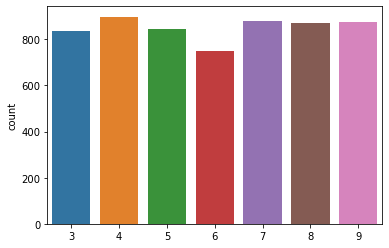

In [108]:
sns.countplot(y_pred1)

In [109]:
print("Accuracy:\n",accuracy_score(y_pred1,y_test1)*100)
print("\n")
print("Confusion Matrix:\n",confusion_matrix(y_pred1,y_test1))
print("\n")
print("Classification Report:\n",classification_report(y_pred1,y_test1))
print("\n")

Accuracy:
 91.77300201477502


Confusion Matrix:
 [[835   0   0   0   0   0   0]
 [  0 876  15   7   0   0   0]
 [  0   0 673 165   8   0   0]
 [  0   0 124 588  39   0   0]
 [  0   0  18 112 748   0   0]
 [  0   0   0   0   2 870   0]
 [  0   0   0   0   0   0 876]]


Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       835
           4       1.00      0.98      0.99       898
           5       0.81      0.80      0.80       846
           6       0.67      0.78      0.72       751
           7       0.94      0.85      0.89       878
           8       1.00      1.00      1.00       872
           9       1.00      1.00      1.00       876

    accuracy                           0.92      5956
   macro avg       0.92      0.91      0.92      5956
weighted avg       0.92      0.92      0.92      5956





In [110]:
X_test1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1901,0,7.4,0.210,0.30,7.90,0.039,14.0,118.0,0.99420,2.96,0.34,10.4
9512,0,6.7,0.250,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4
5140,1,7.7,0.580,0.10,1.80,0.102,28.0,109.0,0.99565,3.08,0.49,9.8
8660,0,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9
438,0,7.4,0.155,0.34,3.00,0.045,73.5,214.0,0.99340,3.18,0.61,9.9


In [111]:
y_test1.head()

1901    5
9512    3
5140    6
8660    9
438     7
Name: quality, dtype: int64

In [112]:
predictor=rfc1.predict([[0,7.4,0.210,0.30,7.90,0.039,14.0,118.0,0.99420,2.96,0.34,10.4]])

C:\Users\Somesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [113]:
predictor

array([5], dtype=int64)

In [114]:
import pickle
pickle.dump(rfc1,open('Wine_Quality_predictor.pkl','wb'))